In [54]:
import pandas as pd
import requests
import time
import os

In [55]:
cwd = os.getcwd()

In [56]:
df_price = pd.read_csv(cwd + '/data/prix-des-carburants-en-france-flux-instantane-v2.csv',sep=';')
df_price.head()

,id,latitude,longitude,cp,pop,adresse,ville,horaires,services,prix,...,sp98_maj,sp98_prix,carburants_disponibles,carburants_indisponibles,horaires_automate_24_24,services_service,departement,code_departement,region,code_region
0,13400003,4.329700e+06,558600.000000,13400,R,1000 Route de Gemenos,Aubagne,"{""@automate-24-24"": """", ""jour"": [{""@id"": ""1"", ...","{""service"": [""Boutique alimentaire"", ""Boutique...","[{""@nom"": ""Gazole"", ""@id"": ""1"", ""@maj"": ""2023-...",...,2023-10-14 08:09:06,1.990,"Gazole,E85,E10,SP98","SP95,GPLc",Non,"Boutique alimentaire,Boutique non alimentaire,...",Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93.0
1,62180002,5.041200e+06,160800.000000,62180,R,LA FOLIE NORD,Rang-du-Fliers,"{""@automate-24-24"": """", ""jour"": [{""@id"": ""1"", ...","{""service"": [""Toilettes publiques"", ""Laverie"",...","[{""@nom"": ""Gazole"", ""@id"": ""1"", ""@maj"": ""2023-...",...,2023-10-28 19:00:00,1.875,"Gazole,GPLc,E10,SP98","SP95,E85",Non,"Toilettes publiques,Laverie,Relais colis,Bouti...",Pas-de-Calais,62,Hauts-de-France,32.0
2,39120002,4.695813e+06,540934.229503,39120,R,Route de Longwy,Chaussin,"{""@automate-24-24"": """", ""jour"": [{""@id"": ""1"", ...","{""service"": [""Boutique alimentaire"", ""Boutique...","[{""@nom"": ""Gazole"", ""@id"": ""1"", ""@maj"": ""2023-...",...,2023-10-20 09:46:54,1.889,"Gazole,E10,SP98","SP95,E85,GPLc",Non,"Boutique alimentaire,Boutique non alimentaire,...",Jura,39,Bourgogne-Franche-Comté,27.0
3,83136012,4.333900e+06,608400.000000,83136,R,43 avenue de La Liberation,Forcalqueiret,"{""@automate-24-24"": ""1"", ""jour"": [{""@id"": ""1"",...","{""service"": [""Boutique alimentaire"", ""Vente de...","[{""@nom"": ""Gazole"", ""@id"": ""1"", ""@maj"": ""2023-...",...,2023-10-28 07:26:49,1.990,"Gazole,SP95,SP98","E85,GPLc,E10",Oui,"Boutique alimentaire,Vente de fioul domestique...",Var,83,Provence-Alpes-Côte d'Azur,93.0
4,61200006,4.875200e+06,-1300.000000,61200,R,21-23 Rue Pierre Bérégovoy,Argentan,"{""@automate-24-24"": ""1"", ""jour"": [{""@id"": ""1"",...","{""service"": [""Toilettes publiques"", ""Relais co...","[{""@nom"": ""Gazole"", ""@id"": ""1"", ""@maj"": ""2023-...",...,2023-10-25 17:00:42,1.835,"Gazole,SP95,SP98","E85,GPLc,E10",Oui,"Toilettes publiques,Relais colis,Boutique alim...",Orne,61,Normandie,28.0


In [57]:
df_price.columns

Index(['id', 'latitude', 'longitude', 'cp', 'pop', 'adresse', 'ville',
       'horaires', 'services', 'prix', 'geom', 'gazole_maj', 'gazole_prix',
       'sp95_maj', 'sp95_prix', 'e85_maj', 'e85_prix', 'gplc_maj', 'gplc_prix',
       'e10_maj', 'e10_prix', 'sp98_maj', 'sp98_prix',
       'carburants_disponibles', 'carburants_indisponibles',
       'horaires_automate_24_24', 'services_service', 'departement',
       'code_departement', 'region', 'code_region'],
      dtype='object')

In [58]:
# Un tableau contenant tous les noms de carburants

name_carburants = df_price['carburants_disponibles'].str.split(',').explode().unique()
name_carburants = name_carburants[~pd.isna(name_carburants)]
name_carburants

array(['Gazole', 'E85', 'E10', 'SP98', 'GPLc', 'SP95'], dtype=object)

In [59]:
# Un tableau contenant tous les noms de département

name_departements = df_price['departement'].unique()
name_departements = name_departements[~pd.isna(name_departements)]
name_departements = sorted(name_departements)
name_departements

['Ain',
 'Aisne',
 'Allier',
 'Alpes-Maritimes',
 'Alpes-de-Haute-Provence',
 'Ardennes',
 'Ardèche',
 'Ariège',
 'Aube',
 'Aude',
 'Aveyron',
 'Bas-Rhin',
 'Bouches-du-Rhône',
 'Calvados',
 'Cantal',
 'Charente',
 'Charente-Maritime',
 'Cher',
 'Corrèze',
 'Corse-du-Sud',
 'Creuse',
 "Côte-d'Or",
 "Côtes-d'Armor",
 'Deux-Sèvres',
 'Dordogne',
 'Doubs',
 'Drôme',
 'Essonne',
 'Eure',
 'Eure-et-Loir',
 'Finistère',
 'Gard',
 'Gers',
 'Gironde',
 'Haut-Rhin',
 'Haute-Corse',
 'Haute-Garonne',
 'Haute-Loire',
 'Haute-Marne',
 'Haute-Savoie',
 'Haute-Saône',
 'Haute-Vienne',
 'Hautes-Alpes',
 'Hautes-Pyrénées',
 'Hauts-de-Seine',
 'Hérault',
 'Ille-et-Vilaine',
 'Indre',
 'Indre-et-Loire',
 'Isère',
 'Jura',
 'Landes',
 'Loir-et-Cher',
 'Loire',
 'Loire-Atlantique',
 'Loiret',
 'Lot',
 'Lot-et-Garonne',
 'Lozère',
 'Maine-et-Loire',
 'Manche',
 'Marne',
 'Mayenne',
 'Meurthe-et-Moselle',
 'Meuse',
 'Morbihan',
 'Moselle',
 'Nièvre',
 'Nord',
 'Oise',
 'Orne',
 'Paris',
 'Pas-de-Calais',
 '

In [60]:
# Un tableau contenant tous les noms de région

name_regions = df_price['region'].unique()
name_regions = name_regions[~pd.isna(name_regions)]
name_regions = sorted(name_regions)
name_regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Corse',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [61]:
# Un tableau contenant tous les noms de ville

name_villes = df_price['ville'].unique()
name_villes = name_villes[~pd.isna(name_villes)]
name_villes = sorted(name_villes)
name_villes

['Abbeville',
 'Ablis',
 'Abondance',
 'Abondant',
 'Abscon',
 'Accous',
 'Acheux-en-Amiénois',
 'Achicourt',
 'Achères',
 'Achères-la-Forêt',
 'Agde',
 'Agen',
 'Agneaux',
 'Agon-Coutainville',
 'Agonac',
 'Ahun',
 'Aibre',
 'Aiffres',
 'Aignay-le-Duc',
 'Aigondigné',
 'Aigre',
 "Aigrefeuille-d'Aunis",
 'Aigrefeuille-sur-Maine',
 'Aigueperse',
 'Aigues-Mortes',
 'Aiguilhe',
 'Aiguillon',
 'Aigurande',
 'Aillas',
 'Aillon-le-Jeune',
 'Ailly-le-Haut-Clocher',
 'Ailly-sur-Noye',
 'Ailly-sur-Somme',
 'Aimargues',
 'Aime-la-Plagne',
 'Ainay-le-Château',
 'Airaines',
 "Aire-sur-l'Adour",
 'Aire-sur-la-Lys',
 'Airvault',
 'Aiserey',
 'Aix-Noulette',
 'Aix-Villemaur-Pâlis',
 'Aix-en-Provence',
 'Aix-les-Bains',
 'Aixe-sur-Vienne',
 'Aizenay',
 'Ajaccio',
 'Alata',
 'Alban',
 'Albaret-Sainte-Marie',
 'Albert',
 'Albertville',
 'Albi',
 'Albias',
 'Albon',
 'Alby-sur-Chéran',
 'Alençon',
 'Alfortville',
 'Algrange',
 'Alincthun',
 'Alissas',
 'Alixan',
 'Allaire',
 'Allan',
 'Allassac',
 'Allau

In [62]:
# Dictionnaire contenant le nombre de stations par carburant

summary = [
    {'Carburant': 'E10', 'Nombre de stations': len(df_price[df_price['e10_prix'].notnull()])},
    {'Carburant': 'Gazole', 'Nombre de stations': len(df_price[df_price['gazole_prix'].notnull()])},
    {'Carburant': 'SP95', 'Nombre de stations': len(df_price[df_price['sp95_prix'].notnull()])},
    {'Carburant': 'SP98', 'Nombre de stations': len(df_price[df_price['sp98_prix'].notnull()])},
    {'Carburant': 'E85', 'Nombre de stations': len(df_price[df_price['e85_prix'].notnull()])},
    {'Carburant': 'GPLC', 'Nombre de stations': len(df_price[df_price['gplc_prix'].notnull()])},
]

summary

[{'Carburant': 'E10', 'Nombre de stations': 7267},
 {'Carburant': 'Gazole', 'Nombre de stations': 9655},
 {'Carburant': 'SP95', 'Nombre de stations': 3639},
 {'Carburant': 'SP98', 'Nombre de stations': 8024},
 {'Carburant': 'E85', 'Nombre de stations': 3481},
 {'Carburant': 'GPLC', 'Nombre de stations': 1352}]

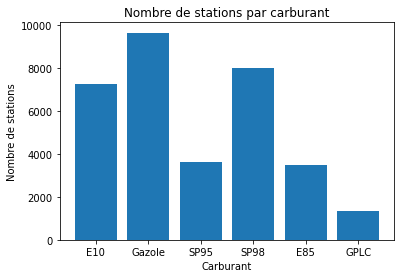

In [63]:
import matplotlib.pyplot as plt

df_summary = pd.DataFrame(summary)

# Affichage du nombre de stations par carburant

plt.bar(df_summary['Carburant'], df_summary['Nombre de stations'])
plt.title('Nombre de stations par carburant')
plt.xlabel('Carburant')
plt.ylabel('Nombre de stations')
plt.show()

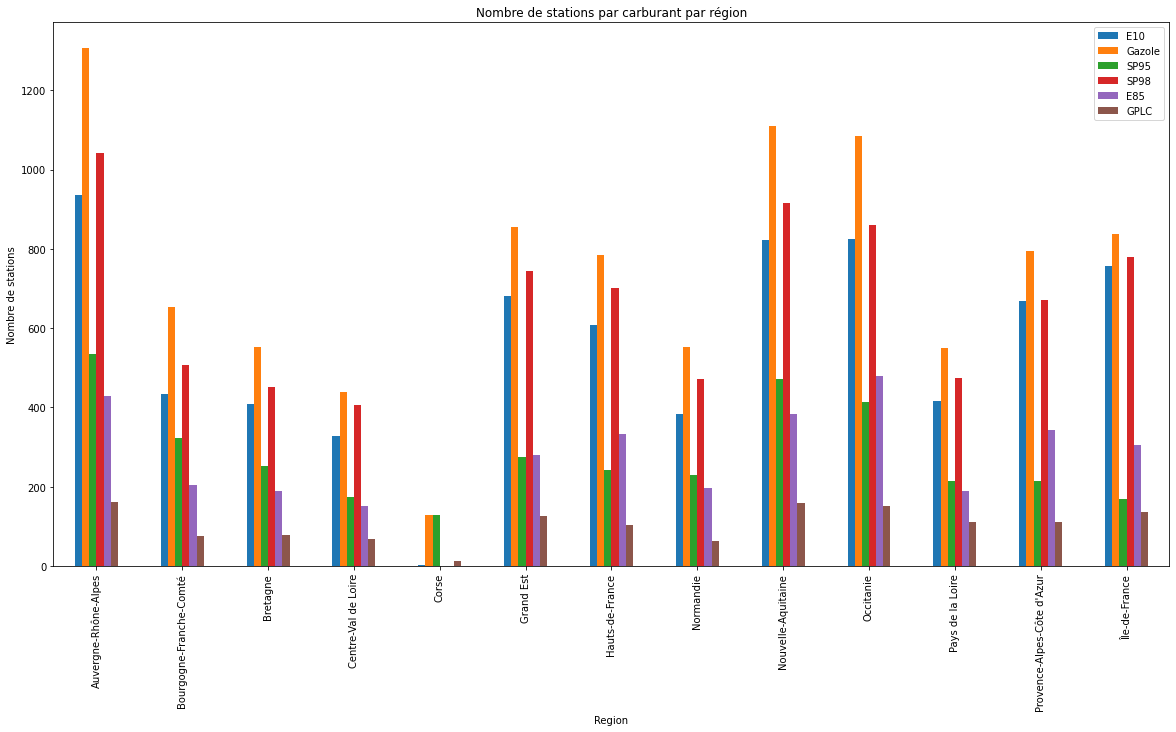

In [64]:
# Affichage du nombre de stations par carburant par région

summary_region = []

for region in name_regions:
    summary_region.append({
        'Region': region,
        'E10': len(df_price[(df_price['e10_prix'].notnull()) & (df_price['region'] == region)]),
        'Gazole': len(df_price[(df_price['gazole_prix'].notnull()) & (df_price['region'] == region)]),
        'SP95': len(df_price[(df_price['sp95_prix'].notnull()) & (df_price['region'] == region)]),
        'SP98': len(df_price[(df_price['sp98_prix'].notnull()) & (df_price['region'] == region)]),
        'E85': len(df_price[(df_price['e85_prix'].notnull()) & (df_price['region'] == region)]),
        'GPLC': len(df_price[(df_price['gplc_prix'].notnull()) & (df_price['region'] == region)]),
    })

df_summary_region = pd.DataFrame(summary_region)

df_summary_region.plot.bar(x='Region', y=['E10', 'Gazole', 'SP95', 'SP98', 'E85', 'GPLC'], figsize=(20, 10))
plt.title('Nombre de stations par carburant par région')
plt.xlabel('Region')
plt.ylabel('Nombre de stations')
plt.show()

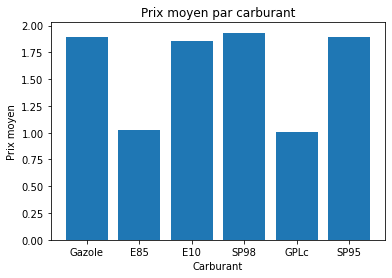

In [65]:
# Affichage du prix moyen par carburant

summary_price = []

for carburant in name_carburants:
    summary_price.append({
        'Carburant': carburant,
        'Prix moyen': df_price[carburant.lower() + '_prix'].mean(),
    })

df_summary_price = pd.DataFrame(summary_price)

plt.bar(df_summary_price['Carburant'], df_summary_price['Prix moyen'])
plt.title('Prix moyen par carburant')
plt.xlabel('Carburant')
plt.ylabel('Prix moyen')
plt.show()

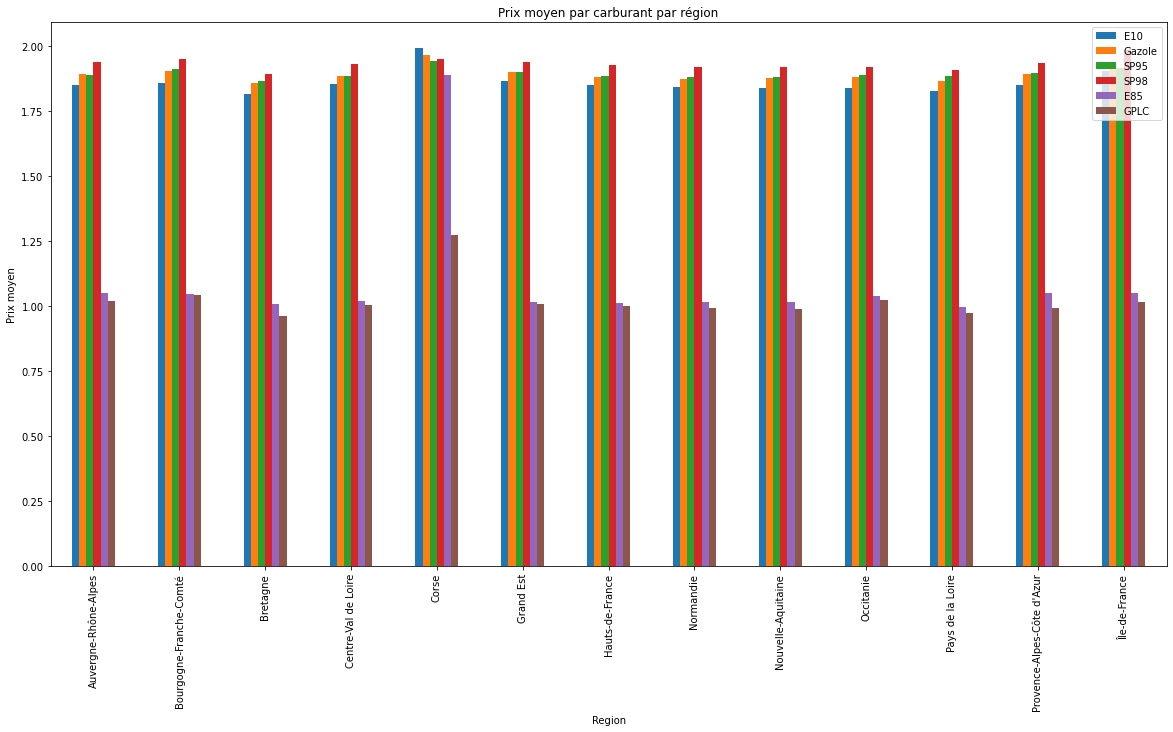

In [66]:
# Affichage du prix moyen par carburant par région

summary_price_region = []

for region in name_regions:
    summary_price_region.append({
        'Region': region,
        'E10': df_price[(df_price['e10_prix'].notnull()) & (df_price['region'] == region)]['e10_prix'].mean(),
        'Gazole': df_price[(df_price['gazole_prix'].notnull()) & (df_price['region'] == region)]['gazole_prix'].mean(),
        'SP95': df_price[(df_price['sp95_prix'].notnull()) & (df_price['region'] == region)]['sp95_prix'].mean(),
        'SP98': df_price[(df_price['sp98_prix'].notnull()) & (df_price['region'] == region)]['sp98_prix'].mean(),
        'E85': df_price[(df_price['e85_prix'].notnull()) & (df_price['region'] == region)]['e85_prix'].mean(),
        'GPLC': df_price[(df_price['gplc_prix'].notnull()) & (df_price['region'] == region)]['gplc_prix'].mean(),
    })

df_summary_price_region = pd.DataFrame(summary_price_region)

df_summary_price_region.plot.bar(x='Region', y=['E10', 'Gazole', 'SP95', 'SP98', 'E85', 'GPLC'], figsize=(20, 10))

plt.title('Prix moyen par carburant par région')
plt.xlabel('Region')
plt.ylabel('Prix moyen')
plt.show()

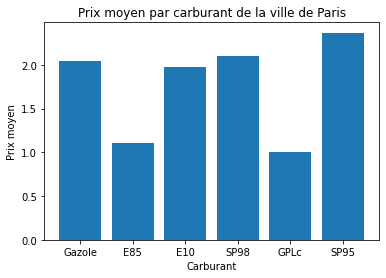

In [67]:
ville = 'Paris'

url = f"https://api.prix-carburants.2aaz.fr/pdv_liste/?opendata=v2&q={ville}"

r = requests.get(url, allow_redirects=True)

# Affichage du prix moyen par carburant de la ville

summary_price_ville = []

for carburant in name_carburants:
    summary_price_ville.append({
        'Carburant': carburant,
        'Prix moyen': df_price[(df_price['ville'] == ville) & (df_price[carburant.lower() + '_prix'].notnull())][carburant.lower() + '_prix'].mean(),
    })

df_summary_price_ville = pd.DataFrame(summary_price_ville)

plt.bar(df_summary_price_ville['Carburant'], df_summary_price_ville['Prix moyen'])
plt.title('Prix moyen par carburant de la ville de ' + ville)
plt.xlabel('Carburant')
plt.ylabel('Prix moyen')
plt.show()

Get Data

In [68]:
timestamp = time.time()
date_hour_recup = time.strftime("%Y-%m-%d %H:%M", time.localtime(timestamp))
date_hour_recup = date_hour_recup.replace('-', '_').replace(' ', '_').replace(':', '_')

url = "https://data.economie.gouv.fr/api/explore/v2.1/catalog/datasets/prix-des-carburants-en-france-flux-instantane-v2/exports/csv"
nom_fichier_local = f"prix-des-carburants-en-france-flux-instantane-v2_{date_hour_recup}.csv"

response = requests.get(url)

# if response.status_code == 200:
#     with open("data/"+ nom_fichier_local, 'wb') as file:
#         file.write(response.content)
# else:
#     print("Échec du téléchargement. Code de statut :", response.status_code)


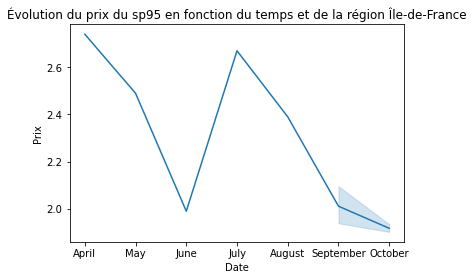

In [69]:
import seaborn as sns

region = 'Île-de-France'
type_carburant = 'sp95'
date_debut = '2023-01-01'
date_fin = '2023-10-27'

df_price_ = df_price[(df_price[f'{type_carburant}_prix'].notnull()) & (df_price['region'] == f'{region}')][[f'{type_carburant}_maj', f'{type_carburant}_prix']]
df_price_[f'{type_carburant}_maj'] = pd.to_datetime(df_price_[f'{type_carburant}_maj'])
df_price_= df_price_.sort_values(by=[f'{type_carburant}_maj'])
df_price_  = df_price_[(df_price_[f'{type_carburant}_maj'] >= f'{date_debut}') & (df_price_[f'{type_carburant}_maj'] <= f'{date_fin}')]
df_price_[f'{type_carburant}_maj'] = df_price_[f'{type_carburant}_maj'].dt.strftime('%B')

sns.lineplot(x=df_price_[f'{type_carburant}_maj'], y=df_price_[f'{type_carburant}_prix'])
plt.title(f'Évolution du prix du {type_carburant} en fonction du temps et de la région {region}')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.show()

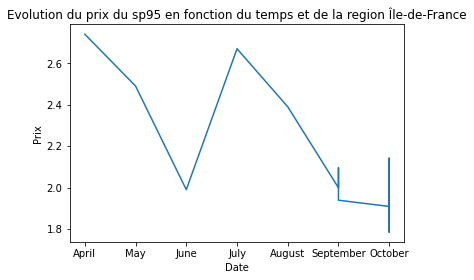

In [70]:
# scatterplot avec line de l'evolution du prix du carburant en fonction du temps et de la region

region = 'Île-de-France'
type_carburant = 'sp95'
date_debut = '2023-01-01'
date_fin = '2023-10-27'

df_price_ = df_price[(df_price[f'{type_carburant}_prix'].notnull()) & (df_price['region'] == f'{region}')][[f'{type_carburant}_maj', f'{type_carburant}_prix']]
df_price_[f'{type_carburant}_maj'] = pd.to_datetime(df_price_[f'{type_carburant}_maj'])
df_price_= df_price_.sort_values(by=[f'{type_carburant}_maj'])
df_price_  = df_price_[(df_price_[f'{type_carburant}_maj'] >= f'{date_debut}') & (df_price_[f'{type_carburant}_maj'] <= f'{date_fin}')]
df_price_[f'{type_carburant}_maj'] = df_price_[f'{type_carburant}_maj'].dt.strftime('%B')

plt.plot(df_price_[f'{type_carburant}_maj'], df_price_[f'{type_carburant}_prix'])
plt.title(f'Evolution du prix du {type_carburant} en fonction du temps et de la region {region}')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.show()

In [71]:
data_price = df_price[(df_price['latitude'].notnull()) & (df_price['longitude'].notnull()) & df_price['ville']][['latitude', 'longitude','ville']]
data_price.head()

,latitude,longitude,ville
0,4.329700e+06,558600.000000,Aubagne
1,5.041200e+06,160800.000000,Rang-du-Fliers
2,4.695813e+06,540934.229503,Chaussin
3,4.333900e+06,608400.000000,Forcalqueiret
4,4.875200e+06,-1300.000000,Argentan


In [19]:
# import pyproj

# # Convertir les coordonnées de la projection EPGS 3857 en latitude et longitude décimales
# def convert_coordinates(row):
#     in_proj = pyproj.Proj(init='epsg:3857')
#     out_proj = pyproj.Proj(init='epsg:4326')
#     lon, lat = pyproj.transform(in_proj, out_proj, row['longitude'], row['latitude'])
#     return pd.Series({'latitude': lat, 'longitude': lon})

# data_price[['latitude', 'longitude']] = data_price.apply(convert_coordinates, axis=1)

# data_price.head()

In [20]:
# def custom_tooltip(row):
#     carburants_indisponibles = row["carburants_indisponibles"]
    
#     tooltip_text = f"{row['ville']}\n"
    
#     carburants = ["sp95", "e10", "sp98", "gplc", "e85", "gazole"]
    
#     for carburant in carburants:
#         prix_col = f"{carburant}_prix"
#         maj_col = f"{carburant}_maj"
        
#         if carburant in carburants_indisponibles:
#             tooltip_text += f"{carburant}: indisponible\n"
#         else:
#             # Check if the value is a valid datetime object
#             maj_value = row[maj_col].iloc[0]
#             if pd.notna(maj_value) and isinstance(maj_value, pd.Timestamp):
#                 maj_value = maj_value.strftime('%Y-%m-%d %H:%M:%S')
#             else:
#                 maj_value = "N/A"
            
#             prix_value = row[prix_col].iloc[0]
#             tooltip_text += f"{carburant}: {prix_value:.3f} € MAJ {maj_value}\n"
    
#     # Convert carburants_indisponibles to a list of strings
#     carburants_indisponibles = [str(item) for item in carburants_indisponibles]
#     tooltip_text += f"Carburants indisponibles: {', '.join(carburants_indisponibles)}"
    
#     return {"text": tooltip_text}


{"text": "{ville}\nGasole: {gazole_prix} € MAJ {gazole_maj}\nSP95: {sp95_prix} € MAJ {sp95_maj}\nE10: {e10_prix} € MAJ {e10_maj}\nSP98: {sp98_prix} € MAJ {sp98_maj}\nGPLc: {gplc_prix} € MAJ {gplc_maj}\nE85: {e85_prix} € MAJ {e85_maj}\nCarburants indisponibles: {carburants_indisponibles}"}

In [21]:
# from datetime import datetime

# def custom_tooltip(ville, gazole_prix, gazole_maj, sp95_prix, sp95_maj, e10_prix, e10_maj, sp98_prix, sp98_maj, gplc_prix, gplc_maj, e85_prix, e85_maj):
#     # Convertir la date gazole_maj en objet datetime
#     gazole_maj = datetime.strptime(gazole_maj, "%Y-%m-%d %H:%M:%S")

#     # Formater la date gazole_maj comme "MAJ le JJ/MM à HH:mm"
#     gazole_maj_formatted = "MAJ le {:%d/%m à %H:%M}".format(gazole_maj)

#     # Formater la chaîne de tooltip avec les données mises à jour
#     tooltip = f"{ville}\nGasole: {gazole_prix} € {gazole_maj_formatted}\nSP95: {sp95_prix} € {gazole_maj_formatted}\nE10: {e10_prix} € {gazole_maj_formatted}\nSP98: {sp98_prix} € {gazole_maj_formatted}\nGPLc: {gplc_prix} € {gazole_maj_formatted}\nE85: {e85_prix} € {gazole_maj_formatted}\nCarburants indisponibles: gazole"

#     return {"text": tooltip}

# # Exemple d'utilisation de la fonction custom_tooltip
# tooltip_data = custom_tooltip(df_price.iloc[0]["ville"], df_price.iloc[0]["gazole_prix"], df_price.iloc[0]["gazole_maj"], df_price.iloc[0]["sp95_prix"], df_price.iloc[0]["sp95_maj"], df_price.iloc[0]["e10_prix"], df_price.iloc[0]["e10_maj"], df_price.iloc[0]["sp98_prix"], df_price.iloc[0]["sp98_maj"], df_price.iloc[0]["gplc_prix"], df_price.iloc[0]["gplc_maj"], df_price.iloc[0]["e85_prix"], df_price.iloc[0]["e85_maj"])
# print(tooltip_data["text"])

In [22]:
# import requests
# import pandas as pd

# # Récupérez les données des API
# brands_url = "https://api.prix-carburants.2aaz.fr/brands/"
# stations_url = "https://api.prix-carburants.2aaz.fr/stations/?q=%20%20"

# brands_response = requests.get(brands_url).json()
# stations_response = requests.get(stations_url).json()

# # Créez un dictionnaire de marques de carburant pour une recherche plus rapide
# brand_dict = {brand['id']: brand['name'] for brand in brands_response}

# # Créez une liste pour stocker les marques correspondantes
# brand_list = []

# # Parcourez chaque entrée de df_price
# for index, row in df_price.iterrows():
#     # Récupérez l'ID de la station actuellel
#     station_id = row['id']
    
#     # Recherchez la station correspondante dans les données des stations en utilisant l'ID
#     matching_station = None
#     for station in stations_response:
#         print(station)
#         print("verif :", station['id'] == station_id)
#         print("id_url :", station['id'], type(station['id']))
#         print("id_df :", station_id, type(station_id))
#         if station['id'] == station_id:
#             matching_station = station
#             break

#     # Si une station correspondante est trouvée, attribuez la marque correspondante à la liste brand_list
#     if matching_station:
#         brand_id = matching_station['Brand']['id']
#         brand_list.append(brand_dict.get(brand_id, 'Marque inconnue'))
#     else:
#         brand_list.append('Marque inconnue')

# # Ajoutez la liste brand_list comme colonne "brand" au DataFrame
# df_price['brand'] = brand_list

# Maintenant, df_price contient la colonne "brand" avec les marques correspondantes
# df_price['brand']

In [23]:
import requests
import time

brand_url = "https://api.prix-carburants.2aaz.fr/brand/"

brand_list = []

for x in range(1,140):
    try:
        brand_response = requests.get(brand_url + str(int(x))).json()
        brand_list.append(brand_response)
    except:
        print("brand n'existe pas pour l'id : ",x)

    time.sleep(2)

In [24]:
# Supprimer de brand_list tous les éléments ayant un code égal à 404
brand_list = [x for x in brand_list if isinstance(x, dict) and x.get('code') != 404]

# Afficher la liste mise à jour
brand_list

[{'id': 1,
  'name': 'TotalEnergies',
  'short_name': 'total',
  'nb_stations': 1614},
 {'id': 2,
  'name': 'TotalEnergies Access',
  'short_name': 'totalaccess',
  'nb_stations': 700},
 {'id': 4, 'name': '8 à huit', 'short_name': '8ahuit', 'nb_stations': 4},
 {'id': 5, 'name': 'AGIP', 'short_name': 'agip', 'nb_stations': 4},
 {'id': 6, 'name': 'Atac', 'short_name': 'atac', 'nb_stations': 7},
 {'id': 7, 'name': 'Auchan', 'short_name': 'auchan', 'nb_stations': 219},
 {'id': 12, 'name': 'Avia', 'short_name': 'avia', 'nb_stations': 589},
 {'id': 13,
  'name': 'AVIA XPress',
  'short_name': 'aviaxpress',
  'nb_stations': None},
 {'id': 15, 'name': 'Bi1', 'short_name': 'bi1', 'nb_stations': 4},
 {'id': 17, 'name': 'BP', 'short_name': 'bp', 'nb_stations': 248},
 {'id': 19, 'name': 'BP Express', 'short_name': 'bpexpress', 'nb_stations': 4},
 {'id': 22,
  'name': 'Bricomarché',
  'short_name': 'bricomarche',
  'nb_stations': 1},
 {'id': 24, 'name': 'Campus', 'short_name': 'campus', 'nb_station

In [ ]:
stations_url = "https://api.prix-carburants.2aaz.fr/station/"

# sort df_price['id'] in ascending order
df_price = df_price.sort_values(by=['id'])

brands_response = brand_list

# Créez un dictionnaire de marques de carburant pour une recherche plus rapide
brand_dict = {brand['id']: brand['name'] for brand in brands_response}

# Créez une liste pour stocker les marques correspondantes
brand_list2 = []

for index, row in df_price.iterrows():
    # Récupérez l'ID de la station actuelle
    station_id = row['id']

    print(station_id)
    
    try:
        response = requests.get(stations_url + str(station_id))

        if response.status_code == 200 and response.headers['content-type'] == 'application/json':
            stations_response = response.json()
            matching_station = None

            if int(stations_response['id']) == int(station_id):
                matching_station = stations_response
                print("match OK")

            # Si une station correspondante est trouvée, attribuez la marque correspondante à la liste brand_list
            if matching_station:
                brand_id = matching_station['Brand']['id']
                brand_list2.append(brand_dict.get(brand_id, 'Marque inconnue'))
                print("Marque trouve")
        else:
            print("Réponse non JSON ou statut de réponse non OK")
            brand_list2.append('Marque inconnue')
            print("Marque pas trouve")
    except:
        pass

    time.sleep(4)

In [72]:
# Ajoutez la liste brand_list comme colonne "brand" au DataFrame
df_price['brand'] = brand_list2

# Maintenant, df_price contient la colonne "brand" avec les marques correspondantes
df_price['brand']

0        8ahuit.png
1        8ahuit.png
2        8ahuit.png
3          agip.png
4          atac.png
            ...    
9996       vito.png
9997       vito.png
9998       vito.png
9999       vito.png
10000    weldom.png
Name: brand, Length: 10001, dtype: object

In [39]:
# save brand_list2 in a csv file
df_brand2 = pd.DataFrame(brand_list2, columns=['brand'])
df_brand2.to_csv(cwd + '/data/brand2.csv', index=False)


# save brand_list in a txt file
with open(cwd + '/data/brand.txt', 'w') as f:
    for item in brand_list:
        f.write("%s\n" % item)

In [75]:
# from PIL import Image

# with open(cwd + '/data/brand.txt', 'r') as f:
#     brand_list = f.read().splitlines()

# brand_list = df_price['brand']
# brand_list = brand_list[~pd.isna(brand_list)]
# brand_list = sorted(brand_list)

# brand_list2 = []

# for brand in brand_list:
#     brand = brand.lower()
#     # supprimer les espaces dans le nom de la marque
#     brand = brand.lower().replace(' ', '')
#     brand = brand.replace('.', '')
#     brand = brand.replace('à', 'a')
#     # print(brand)
#     try:
#         im = Image.open(cwd + '/image/brands/' + brand + '.png')
#         brand_list2.append(brand + '.png')
#     except:
#         brand_list2.append('autre.png')

# df_brand = pd.DataFrame(brand_list2, columns=['logo'])
# df_brand.to_csv(cwd + '/data/brand_logo.csv', index=False)

# df_brand_logo = pd.read_csv(cwd + '/data/brand_logo.csv')
# df_price['brand_logo'] = df_brand_logo['logo']